# Limpieza y Transformación de Datos (ETL)

## 1. Objetivo de la etapa
En esta etapa se realizan las transformaciones necesarias para preparar los datos
para el modelado, a partir de los hallazgos del EDA.


## 2. Importacion de librerias y carga de datos

In [23]:
import pandas as pd
import numpy as np
 
df = pd.read_csv('../data/raw/listings.csv')

C:\Users\brian\AppData\Local\Temp\ipykernel_6540\1356392705.py:4: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/listings.csv')


## 3. Limpieza de la variable objetivo (price)

### 3.1 Conversión de price a numérico


In [24]:
df['price'] = (df['price']
               .str.replace('$', '',regex=False)
               .str.replace(',', '',regex=False)
               .astype(float)
)

### 3.2 Validación post-limpieza

In [25]:
df['price'].dtype

dtype('float64')

In [26]:
df['price'].isna().sum()

np.int64(0)

In [27]:
df['price'].describe()

count     23729.000000
mean       4014.875595
std       16075.326378
min           0.000000
25%        1394.000000
50%        2124.000000
75%        3319.000000
max      663732.000000
Name: price, dtype: float64

## 4. Tratamiento de outliers

### 4.1 Definicion del umbral para outliers

In [28]:
per_99 = df['price'].quantile(0.99) #Se utiliza el percentil 99 para eliminar outliers, a partir del EDA.
per_99  

np.float64(30442.040000000386)

### 4.2 Filtrado de valores extremos

In [29]:
df.shape

(23729, 106)

In [30]:
df = df[df['price'] <= per_99]

df.shape

(23491, 106)

## 5. Seleccion inicial de variables

In [31]:
cols = [
    'price',
    'accommodates',
    'bedrooms',
    'bathrooms',
    'room_type',
    'property_type',
    'neighbourhood_cleansed',
    'latitude',
    'longitude',
    'number_of_reviews',
    'reviews_per_month',
    'review_scores_rating',
    'minimum_nights',
    'availability_365'
]

df = df[cols]

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23491 entries, 0 to 23728
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   23491 non-null  float64
 1   accommodates            23491 non-null  int64  
 2   bedrooms                23448 non-null  float64
 3   bathrooms               23429 non-null  float64
 4   room_type               23491 non-null  object 
 5   property_type           23491 non-null  object 
 6   neighbourhood_cleansed  23491 non-null  object 
 7   latitude                23491 non-null  float64
 8   longitude               23491 non-null  float64
 9   number_of_reviews       23491 non-null  int64  
 10  reviews_per_month       17142 non-null  float64
 11  review_scores_rating    16762 non-null  float64
 12  minimum_nights          23491 non-null  int64  
 13  availability_365        23491 non-null  int64  
dtypes: float64(7), int64(4), object(3)
memory u

## 6. Tratamiento de valores faltantes y tipos de datos

In [33]:
df.isna().sum() #Se visualizan los valores nulos, se decide eliminar las filas con valores nulos.

price                        0
accommodates                 0
bedrooms                    43
bathrooms                   62
room_type                    0
property_type                0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
number_of_reviews            0
reviews_per_month         6349
review_scores_rating      6729
minimum_nights               0
availability_365             0
dtype: int64

### 6.1 Tratamiento de nulos

In [34]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['review_scores_rating'] = df['review_scores_rating'].fillna(0)

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())

In [35]:
df.isna().sum()

price                     0
accommodates              0
bedrooms                  0
bathrooms                 0
room_type                 0
property_type             0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
number_of_reviews         0
reviews_per_month         0
review_scores_rating      0
minimum_nights            0
availability_365          0
dtype: int64

### 6.2 Correcion de tipos de datos

In [36]:
df['bedrooms'] = df['bedrooms'].round().astype(int) 
df['bathrooms'] = df['bathrooms'].round().astype(int)

In [37]:
df.dtypes

price                     float64
accommodates                int64
bedrooms                    int64
bathrooms                   int64
room_type                  object
property_type              object
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
number_of_reviews           int64
reviews_per_month         float64
review_scores_rating      float64
minimum_nights              int64
availability_365            int64
dtype: object

## 7. Econding de variables categoricas

### 7.1 One-Hot Encoding

In [38]:
df_encoded = pd.get_dummies(
             df,
             columns=['room_type',
                      'property_type',
                      'neighbourhood_cleansed'],
             drop_first=True   
)

## 8. Dataframe para modelado

In [39]:
df_encoded.shape

(23491, 94)

In [40]:
df_encoded.head()

,price,accommodates,bedrooms,bathrooms,latitude,longitude,number_of_reviews,reviews_per_month,review_scores_rating,minimum_nights,...,neighbourhood_cleansed_Villa Gral. Mitre,neighbourhood_cleansed_Villa Lugano,neighbourhood_cleansed_Villa Luro,neighbourhood_cleansed_Villa Ortuzar,neighbourhood_cleansed_Villa Pueyrredon,neighbourhood_cleansed_Villa Real,neighbourhood_cleansed_Villa Riachuelo,neighbourhood_cleansed_Villa Santa Rita,neighbourhood_cleansed_Villa Soldati,neighbourhood_cleansed_Villa Urquiza
0,3983.0,2,1,1,-34.58184,-58.42415,26,0.27,95.0,2,...,False,False,False,False,False,False,False,False,False,False
1,1593.0,1,1,1,-34.59761,-58.39468,20,0.16,95.0,1,...,False,False,False,False,False,False,False,False,False,False
2,2987.0,2,1,1,-34.59382,-58.42994,1,0.06,100.0,1,...,False,False,False,False,False,False,False,False,False,False
3,2987.0,2,1,1,-34.59398,-58.42853,0,0.00,0.0,1,...,False,False,False,False,False,False,False,False,False,False
4,2987.0,2,1,1,-34.59348,-58.42949,66,1.89,99.0,1,...,False,False,False,False,False,False,False,False,False,False


In [41]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23491 entries, 0 to 23728
Data columns (total 94 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   price                                     23491 non-null  float64
 1   accommodates                              23491 non-null  int64  
 2   bedrooms                                  23491 non-null  int64  
 3   bathrooms                                 23491 non-null  int64  
 4   latitude                                  23491 non-null  float64
 5   longitude                                 23491 non-null  float64
 6   number_of_reviews                         23491 non-null  int64  
 7   reviews_per_month                         23491 non-null  float64
 8   review_scores_rating                      23491 non-null  float64
 9   minimum_nights                            23491 non-null  int64  
 10  availability_365                       

### 8.1 Guardado de dataframe

In [42]:
df_encoded.to_csv('../data/processed/listings_processed.csv', index=False)

## 9. Carga de Dataset Calendar 

In [43]:
import matplotlib.pyplot as plt
df_calendar = pd.read_csv('../data/raw/calendar.csv')

In [56]:
df_calendar['date'].astype

<bound method NDFrame.astype of 0         2020-04-26
1         2020-04-27
2         2020-04-28
3         2020-04-29
4         2020-04-30
             ...    
8661281   2021-04-21
8661282   2021-04-22
8661283   2021-04-23
8661284   2021-04-24
8661285   2021-04-25
Name: date, Length: 8661286, dtype: datetime64[ns]>

In [44]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

df_calendar['price'] = (df_calendar['price']
               .str.replace('$', '',regex=False)
               .str.replace(',', '',regex=False)
               .astype(float)
)

In [45]:
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,50778,2020-04-26,f,2655.0,"$2,655.00",5.0,1125.0
1,133654,2020-04-27,t,1150.0,"$1,150.00",4.0,1125.0
2,133654,2020-04-28,t,1150.0,"$1,150.00",4.0,1125.0
3,133654,2020-04-29,t,1150.0,"$1,150.00",4.0,1125.0
4,133654,2020-04-30,t,1150.0,"$1,150.00",4.0,1125.0


In [46]:
df_calendar.isna().sum() 

listing_id          0
date                0
available           0
price               0
adjusted_price      0
minimum_nights    105
maximum_nights    105
dtype: int64

### 9.1 Precio promedio por dia

In [47]:
daily_price = df_calendar.groupby('date')['price'].mean().reset_index() #Se agrupa por fecha y se calcula el precio promedio diario.
daily_price = daily_price.sort_values('date') #Se ordena por fecha para asegurar que los datos estén en el orden correcto para el análisis de series temporales.


### 9.2 Visualizar precio promedio por dia 

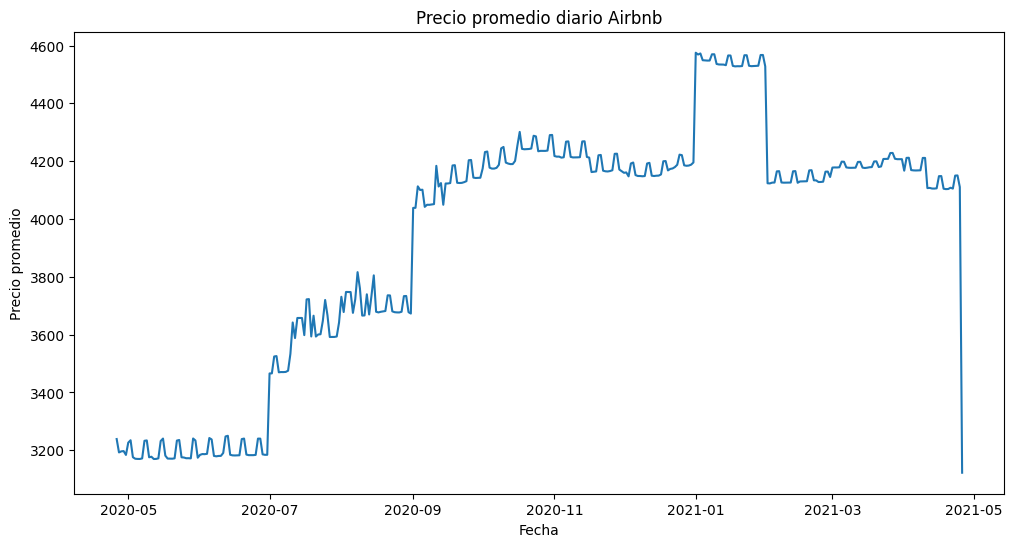

In [48]:
plt.figure(figsize=(12,6))
plt.plot(daily_price["date"], daily_price["price"])
plt.title("Precio promedio diario Airbnb")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio")
plt.show()


In [49]:
daily_price.tail()


,date,price
361,2021-04-22,4105.141135
362,2021-04-23,4150.132370
363,2021-04-24,4150.659488
364,2021-04-25,4110.521598
365,2021-04-26,3122.038973


### 9.3 Quitar dias que no superen el umbral

In [50]:
counts = df_calendar.groupby("date")["listing_id"].count().reset_index() #Se agrupa por fecha y se cuenta el número de listings disponibles cada día, para identificar posibles días con datos faltantes o inconsistentes.
threshold = counts["listing_id"].mean() * 0.7 #Se establece un umbral del 70% del promedio de listings diarios para identificar días con datos faltantes o inconsistentes, lo que puede afectar el análisis de series temporales.
missing_dates = counts[counts["listing_id"] < threshold]["date"] #Se filtran las fechas que tienen un número de listings por debajo del umbral, lo que indica posibles días con datos faltantes o inconsistentes.

print("Fechas con datos faltantes o inconsistentes:")
print(missing_dates)


Fechas con datos faltantes o inconsistentes:
365   2021-04-26
Name: date, dtype: datetime64[ns]


In [51]:
valid_dates = counts[counts["listing_id"] >= threshold]["date"] #Se filtran las fechas que tienen un número de listings por encima del umbral, lo que indica días con datos válidos para el análisis de series temporales.


In [52]:
daily_price = daily_price[daily_price["date"].isin(valid_dates)] 
#Se filtran los datos de precios diarios para incluir solo las fechas válidas, asegurando que el análisis de series temporales se base en datos consistentes y confiables.

In [53]:
daily_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    365 non-null    datetime64[ns]
 1   price   365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.6 KB


### 9.4 Guardado de dataframe para modelado

In [54]:
daily_price.to_csv('../data/processed/daily_price_processed.csv', index=False)